# A árvore de decisão
- **Uma árvore de decisão** é uma representação de um conjunto de regras criado para tomar qualquer decisão, nesse caso classificar um registro (para problemas de classificação) ou estimar um valor (para problemas de regressão)
- Para cada pergunta da árvore, vamos responder "SIM" ou "NÃO" e essas respostas vão nos guiar até a decisão final. Cada uma dessas perguntas são chamadas de **nós de decisão** (sendo o primeiro nó chamado de **nó raiz**) e a decisão que vamos tomar é chamado de **nó folha**
<br><br>
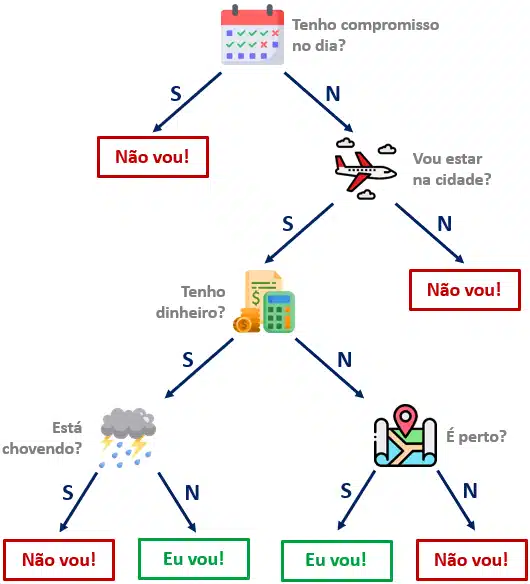

- Em uma base com os seguintes dados, podemos criar essas regras através da divisão da nossa base
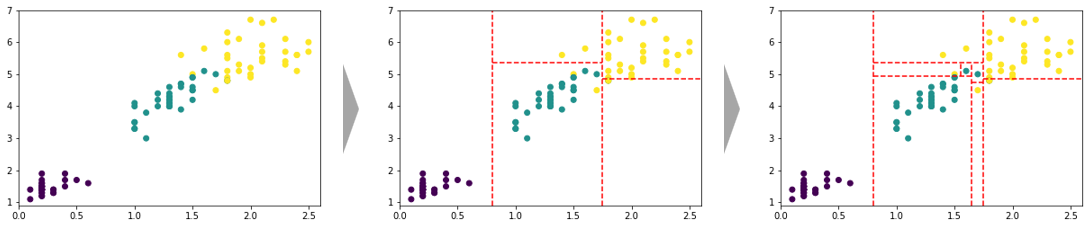

- Para o dataset iris, temos a seguinte árvore:
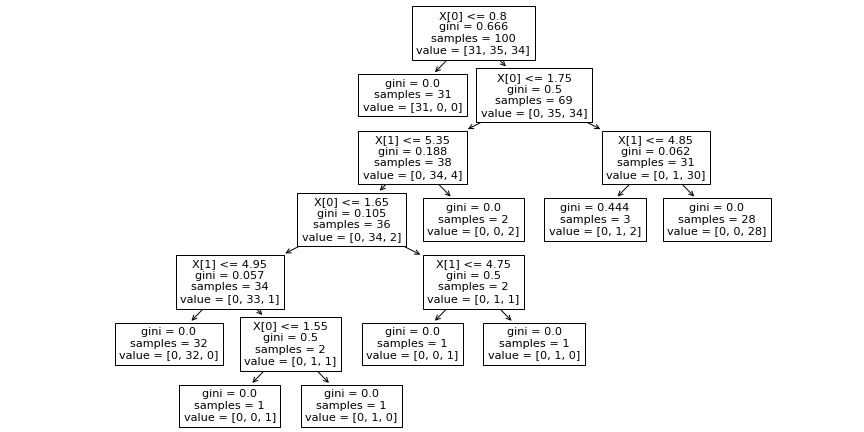

- A árvore de decisão é uma representação, uma estrutura, e somente a árvore não é Aprendizado de Máquinas. **O que é Machine Learning é a escolha dessas regras para a criação da árvore!**
- Existem **diferentes algoritmos** usados para isso, como o ID3, C4.5, C5.0 e CART.
    - https://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart
    - O **scikit-learn**, segundo a própria documentação, usa uma **versão otimizada do CART (Classification and Regression Trees)**
        - Em resumo, a seleção dos nós é feita escolhendo qual recurso e limite vai **tornar os próximos passos o mais homogêneo possível**
- Como podemos criar vários nós para a árvore, é um modelo que facilmente pode sofrer overfitting. **Quanto mais nós e folhas**, maior a complexidade da árvore e **menor sua capacidade de generalizar**

- **Utilizando o dataset iris**
    - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

In [33]:
# Importando o pandas
import pandas as pd

In [34]:
# Importando o dataset iris
from sklearn.datasets import load_iris

In [35]:
# Retornando os dados
data = load_iris()

In [36]:
# Transformando em um DataFrame
iris = pd.DataFrame(data.data)
iris.columns = data.feature_names
iris['target'] = data.target
iris.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


<a id='ajuste_base'></a>
- **Começando apenas com o target 0 e 1 e apenas as colunas de pétala**

In [37]:
# Selecionando apenas as colunas de pétala e esses targets
iris1 = iris.loc[iris.target.isin([1,2]),['petal length (cm)','petal width (cm)','target']]

In [ ]:
# Separando X e Y
X = iris1.drop('target',axis=1)
y = iris1.target

- Vamos usar o train_test_split para separar em treino e teste
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [39]:
# Fazendo o train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

- **Podemos visualizar graficamente os dados de treino dessa base usando o matplotlib**
    - https://matplotlib.org/stable/plot_types/basic/scatter_plot.html#sphx-glr-plot-types-basic-scatter-plot-py

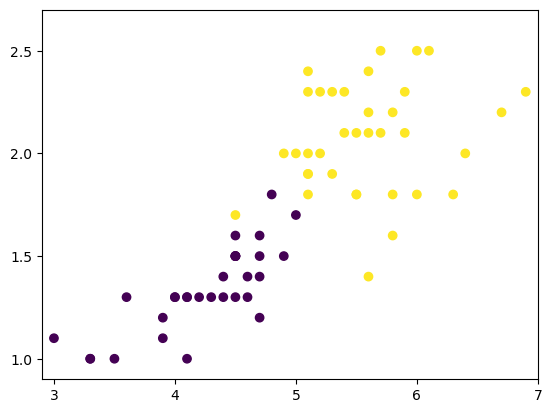

In [40]:
# Visualizando os dados de treino
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(X_train['petal length (cm)'], 
           X_train['petal width (cm)'], 
           c=y_train)

ax.set(xlim=(2.9, 7), xticks=[3,4,5,6,7],
       ylim=(0.9, 2.7), yticks=[1,1.5,2,2.5])

plt.show()

- **E então usar a árvore de decisão para classificar esses dados**
    - https://scikit-learn.org/stable/modules/tree.html

In [41]:
# Importando a árvore de decisão
from sklearn import tree

In [42]:
# Criando o classificador
clf = tree.DecisionTreeClassifier(random_state=42)

In [43]:
# Fazendo o fit com os dados de treino
clf = clf.fit(X_train, y_train)

In [44]:
# Verificando o score
clf.score(X_train,y_train)

1.0

- Podemos exibir essa árvore
    - https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html?highlight=plot_tree#sklearn.tree.plot_tree

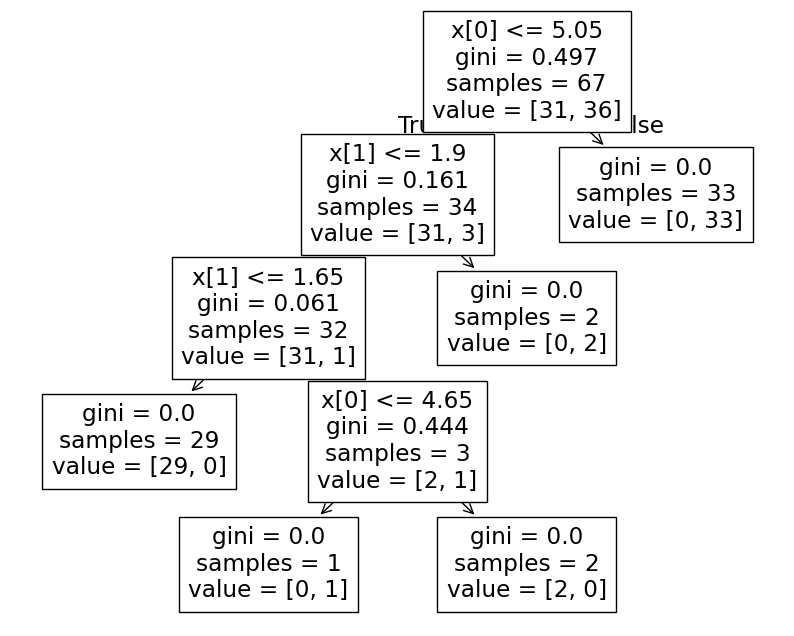

In [45]:
# Visualizando essa árvore
fig, ax = plt.subplots(figsize=(10,8))

tree.plot_tree(clf)

plt.show()

In [46]:
X_train.head(3)

,petal length (cm),petal width (cm)
78,4.5,1.5
143,5.9,2.3
55,4.5,1.3


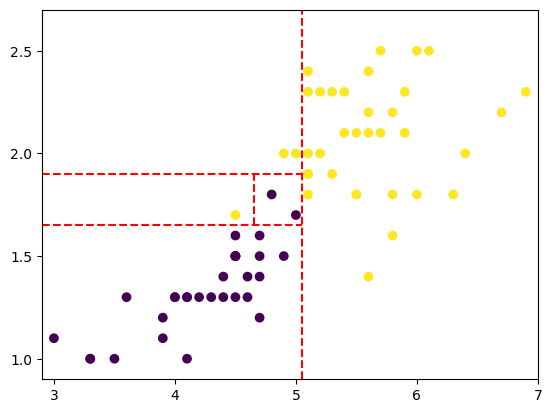

In [47]:
# Podemos adicionar essas regras no nosso gráfico
fig, ax = plt.subplots()

ax.scatter(X_train['petal length (cm)'], 
           X_train['petal width (cm)'], 
           c=y_train)

ax.plot([5.05,5.05],[0.9,2.7],'--r')
ax.plot([2.9,5.05],[1.9,1.9],'--r')
ax.plot([2.9,5.05],[1.65,1.65],'--r')
ax.plot([4.65,4.65],[1.65,1.9],'--r')

ax.set(xlim=(2.9, 7), xticks=[3,4,5,6,7],
       ylim=(0.9, 2.7), yticks=[1,1.5,2,2.5])

plt.show()

In [48]:
# Fazendo a previsão e avaliando o erro
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[18,  1],
       [ 6,  8]])

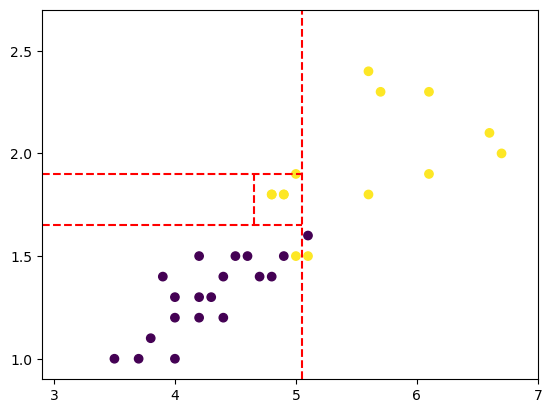

In [49]:
# Visualizando esses dados de teste no gráfico acima
fig, ax = plt.subplots()

ax.scatter(X_test['petal length (cm)'], 
           X_test['petal width (cm)'], 
           c=y_test)

ax.plot([5.05,5.05],[0.9,2.7],'--r')
ax.plot([2.9,5.05],[1.9,1.9],'--r')
ax.plot([2.9,5.05],[1.65,1.65],'--r')
ax.plot([4.65,4.65],[1.65,1.9],'--r')

ax.set(xlim=(2.9, 7), xticks=[3,4,5,6,7],
       ylim=(0.9, 2.7), yticks=[1,1.5,2,2.5])

plt.show()

- **Podemos [voltar](#ajuste_base) no filtro que fizemos da base e agora considerar a todos os targets mas mantendo somente as 2 colunas de pétala**

- **Podemos então fazer para toda a base**

In [50]:
# Separando X e y da base completa
X = iris.drop('target',axis=1)
y = iris.target

In [51]:
# Fazendo o train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [52]:
# Criando o classificador e fazendo o fit
clf2 = tree.DecisionTreeClassifier(random_state=42).fit(X_train,y_train)

In [53]:
# Verificando o score
clf2.score(X_train,y_train)

1.0

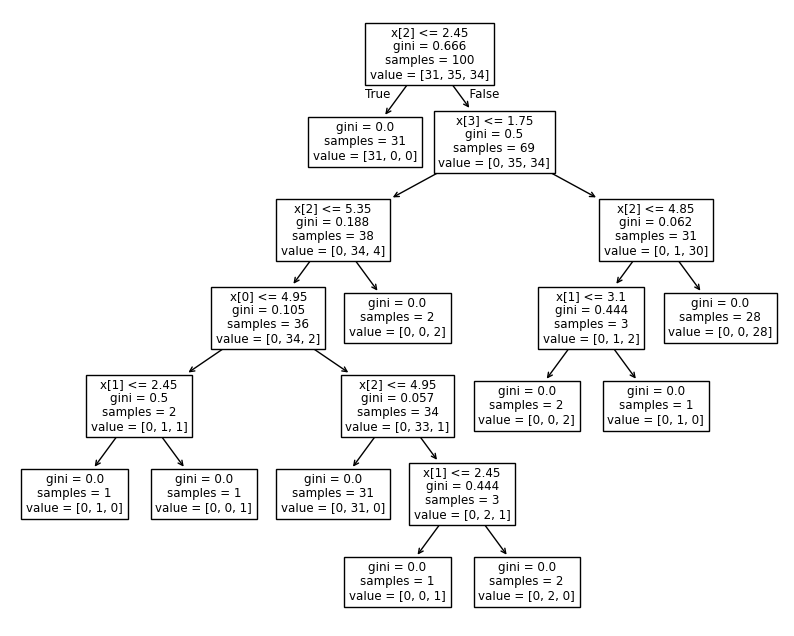

In [54]:
# Visualizando essa árvore
fig, ax = plt.subplots(figsize=(10,8))

tree.plot_tree(clf2)

plt.show()

In [55]:
# Fazendo a previsão
y_pred2 = clf2.predict(X_test)

In [56]:
# Avaliando o modelo
confusion_matrix(y_test,y_pred2)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]])